In [ ]:

import os

import numpy as np
import matplotlib.pyplot as plt

from pywt import WaveletPacket
import pywt.data


ecg = pywt.data.ecg()

wp = WaveletPacket(ecg, 'sym5', maxlevel=4)

fig = plt.figure()
plt.set_cmap('bone')
ax = fig.add_subplot(wp.maxlevel + 1, 1, 1)
ax.plot(ecg, 'k')
ax.set_xlim(0, len(ecg) - 1)
ax.set_title("Wavelet packet coefficients")

for level in range(1, wp.maxlevel + 1):
    ax = fig.add_subplot(wp.maxlevel + 1, 1, level + 1)
    nodes = wp.get_level(level, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(np.array([n.data for n in nodes]))
    ax.imshow(values, interpolation='nearest', aspect='auto')
    ax.set_yticks(
        np.arange(len(labels) - 0.5, -0.5, -1), 
        labels)
    plt.setp(ax.get_xticklabels(), visible=False)

plt.show()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.sp1DWT = 1


def plot_coeffs(data, w, title, use_dwt=True):
    """Show dwt or swt coefficients for given data and wavelet."""
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []

    if use_dwt:
        for i in range(5):
            (a, d) = pywt.dwt(a, w, mode)
            ca.append(a)
            cd.append(d)
    else:
        coeffs = pywt.swt(data, w, 5)  # [(cA5, cD5), ..., (cA1, cD1)]
        for a, d in reversed(coeffs):
            ca.append(a)
            cd.append(d)

    fig = plt.figure()
    ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, x in enumerate(ca):
        ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
        ax.plot(x, 'r')
        ax.set_ylabel("A%d" % (i + 1))
        if use_dwt:
            ax.set_xlim(0, len(x) - 1)
        else:
            ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)

    for i, x in enumerate(cd):
        ax = fig.add_subplot(len(cd) + 1, 2, 4 + i * 2)
        ax.plot(x, 'g')
        ax.set_ylabel("D%d" % (i + 1))
        # Scale axes
        ax.set_xlim(0, len(x) - 1)
        if use_dwt:
            ax.set_ylim(min(0, 1.4 * min(x)), max(0, 1.4 * max(x)))
        else:
            vals = x[w.dec_len * (1 + i):len(x) - w.dec_len * (1 + i)]
            ax.set_ylim(min(0, 2 * min(vals)), max(0, 2 * max(vals)))


# Show DWT coefficients
use_dwt = True
plot_coeffs(data1, 'db1',
            "DWT: Signal irregularity shown in D1 - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "DWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "DWT: Ecg sample - Symmlets5", use_dwt)

# Show DWT coefficients
use_dwt = False
plot_coeffs(data1, 'db1', "SWT: Signal irregularity detection - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "SWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "SWT: Ecg sample - simple QRS detection - Symmlets5",
            use_dwt)


plt.show()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import numpy as np

import matplotlib.pyplot as plt

import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
#         ax.plot(x.imag)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pywt

img = pywt.data.camera().astype(float)

# Fully separable transform
fswavedecn_result = pywt.fswavedecn(img, 'db2', 'periodization', levels=4)

# Standard DWT
coefs = pywt.wavedec2(img, 'db2', 'periodization', level=4)
# convert DWT coefficients to a 2D array
mallat_array, mallat_slices = pywt.coeffs_to_array(coefs)


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(np.abs(mallat_array)**0.25,
           cmap=plt.cm.gray,
           interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('Mallat decomposition\n(wavedec2)')

ax2.imshow(np.abs(fswavedecn_result.coeffs)**0.25,
           cmap=plt.cm.gray,
           interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('Fully separable decomposition\n(fswt)')

plt.show()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

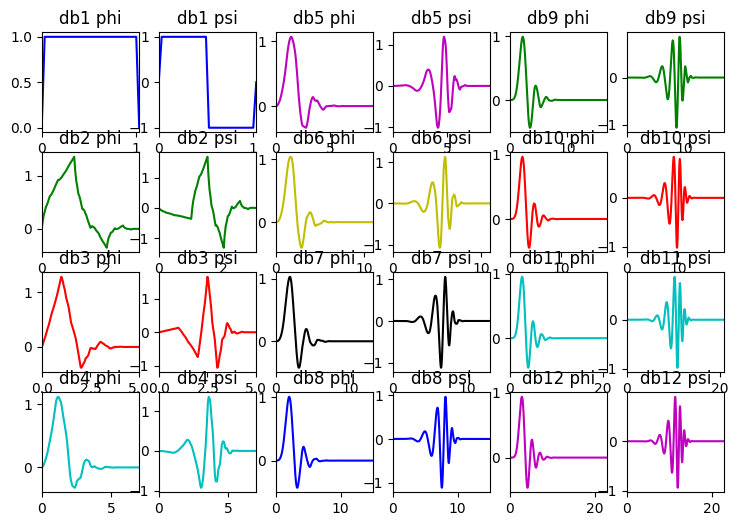

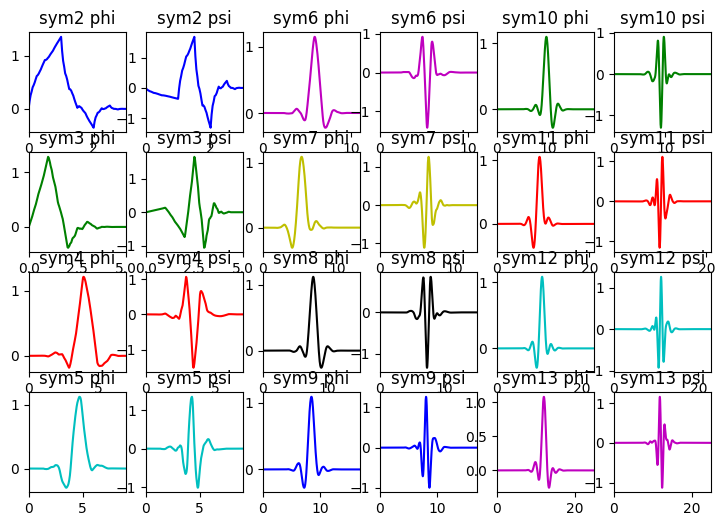

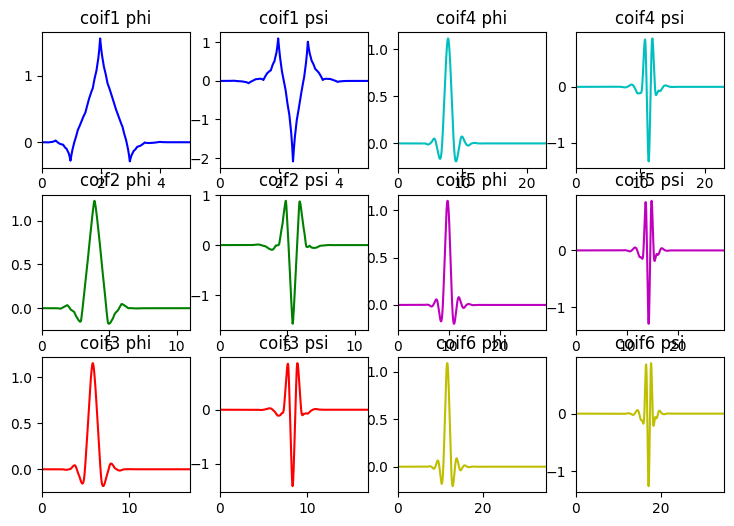

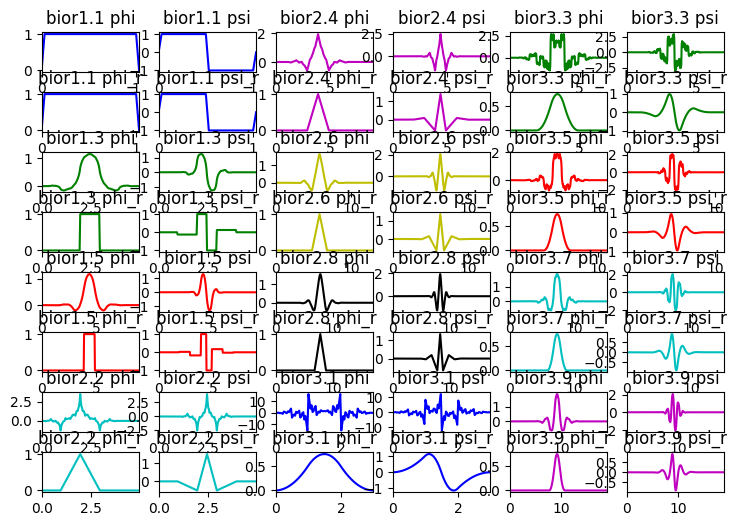

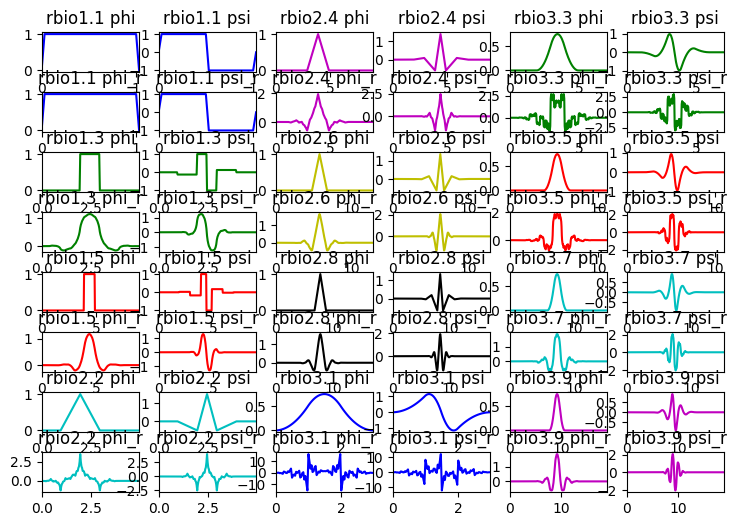

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Plot scaling and wavelet functions for db, sym, coif, bior and rbio families

import itertools

import matplotlib.pyplot as plt

import pywt


plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()

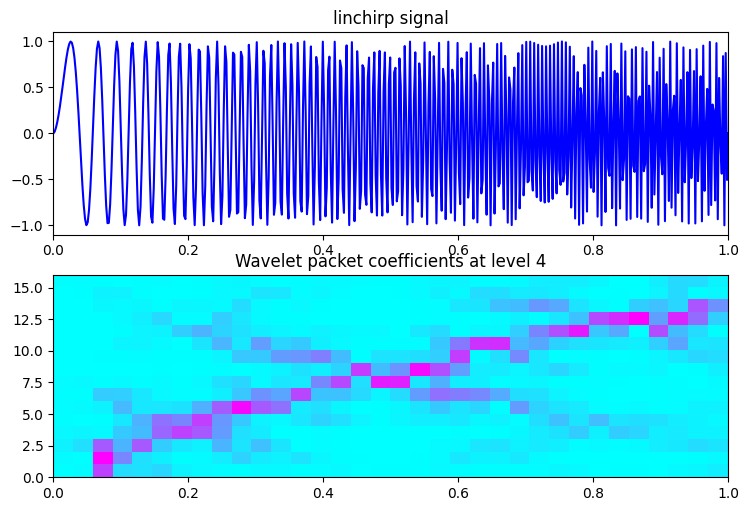

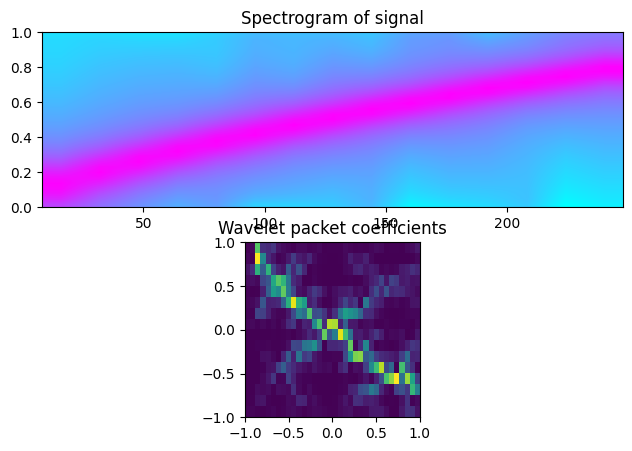

In [11]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt


x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**1.7)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
# ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt

import pywt
import pywt.data


arr = pywt.data.aero()

plt.imshow(arr, interpolation="nearest", cmap=plt.cm.gray)

level = 0
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for LL, (LH, HL, HH) in pywt.swt2(arr, 'bior1.3', level=3, start_level=0):
    fig = plt.figure()
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, origin='upper', interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=12)

    fig.suptitle("SWT2 coefficients, level %s" % level, fontsize=14)
    level += 1


plt.show()

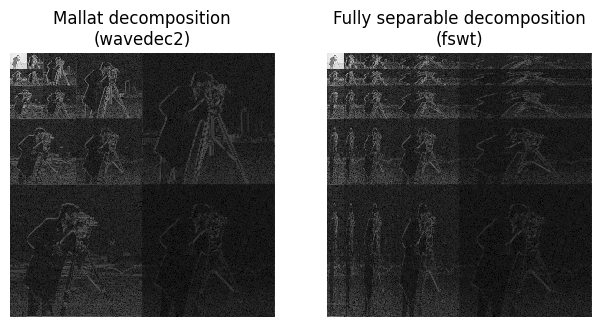

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import pywt

img = pywt.data.camera().astype(float)

# Fully separable transform
fswavedecn_result = pywt.fswavedecn(img, 'db2', 'periodization', levels=4)

# Standard DWT
coefs = pywt.wavedec2(img, 'db2', 'periodization', level=4)
# convert DWT coefficients to a 2D array
mallat_array, mallat_slices = pywt.coeffs_to_array(coefs)


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(np.abs(mallat_array)**0.25,
           cmap=plt.cm.gray,
           interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('Mallat decomposition\n(wavedec2)')

ax2.imshow(np.abs(fswavedecn_result.coeffs)**0.25,
           cmap=plt.cm.gray,
           interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('Fully separable decomposition\n(fswt)')

plt.show()

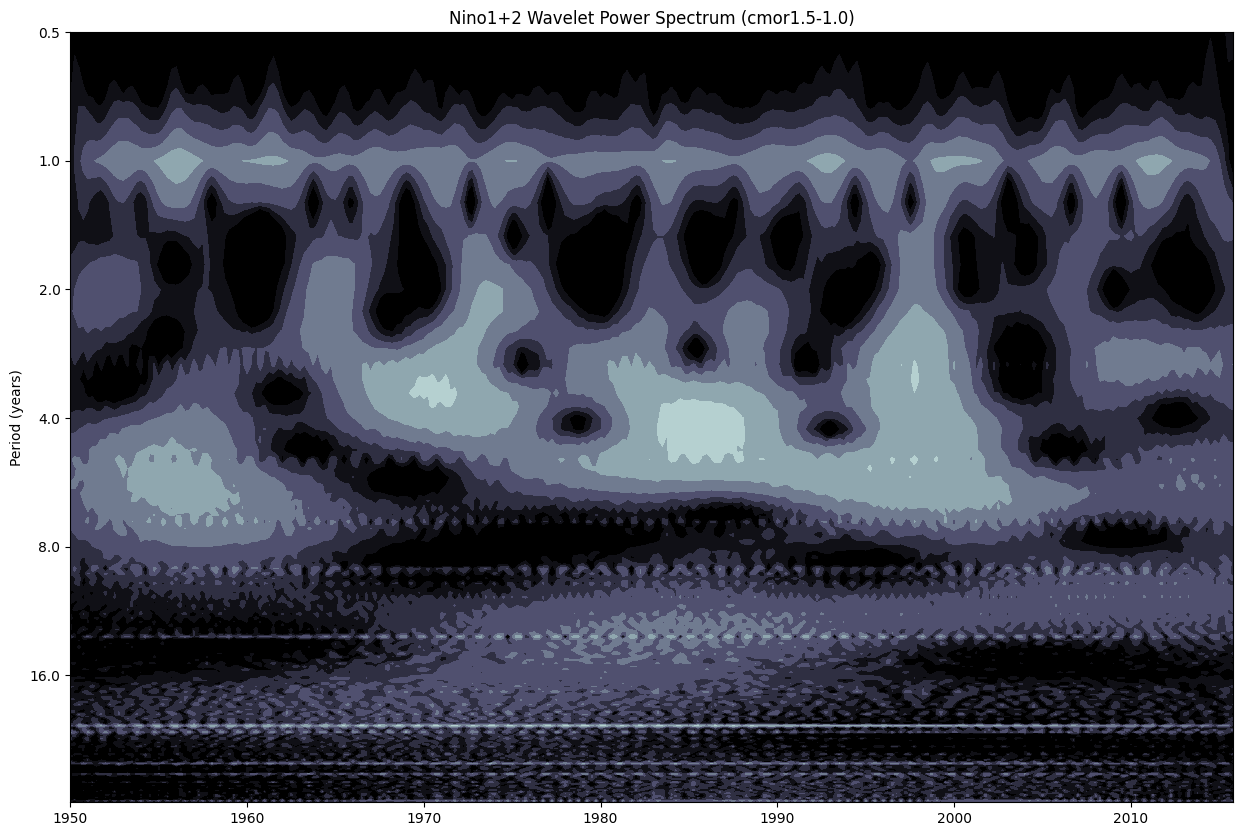

In [16]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()